In [1]:


import numpy as np
import pandas as pd
import os



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv("spam.csv", encoding = 'latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# drop unavailable attributes

data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [5]:
# rename columns 

data = data.rename(columns ={"v1":"target", "v2":"text"})
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#for counting ham and spam

data.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [7]:
data.groupby('target').describe()

text                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

Text(0.5, 1.0, 'Distribution of Spam and Ham')

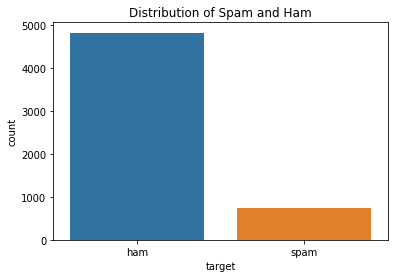

In [8]:
#plotting graph for distribution

sns.countplot(x = "target", data = data)
data.loc[:, 'target'].value_counts()
plt.title('Distribution of Spam and Ham')

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


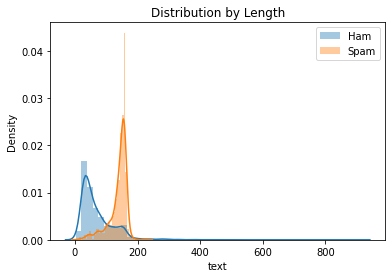

In [9]:
# plotting graph by length.

ham =data[data['target'] == 'ham']['text'].str.len()
sns.distplot(ham, label='Ham')
spam = data[data['target'] == 'spam']['text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


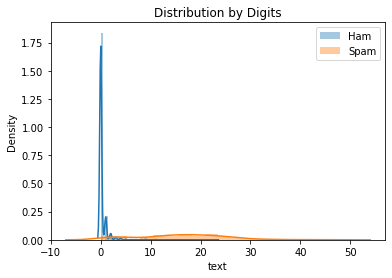

In [10]:
#plotting graph by digits.

ham1 = data[data['target'] == 'ham']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = data[data['target'] == 'spam']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(spam1, label='Spam')
plt.title('Distribution by Digits')
plt.legend()

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


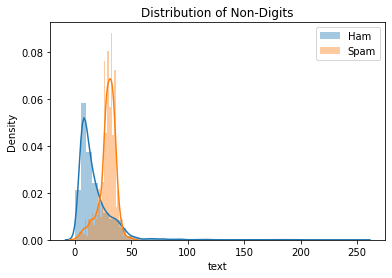

In [11]:
#plotting graph for non-digits.

ham2 = data[data['target'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(ham2, label='Ham')
spam2 = data[data['target'] == 'spam']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(spam2, label='Spam')
plt.title('Distribution of Non-Digits')
plt.legend()

In [12]:
#for counting frequently occurence of spam and ham.

count1 = Counter(" ".join(data[data['target']=='ham']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(data[data['target']=='spam']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

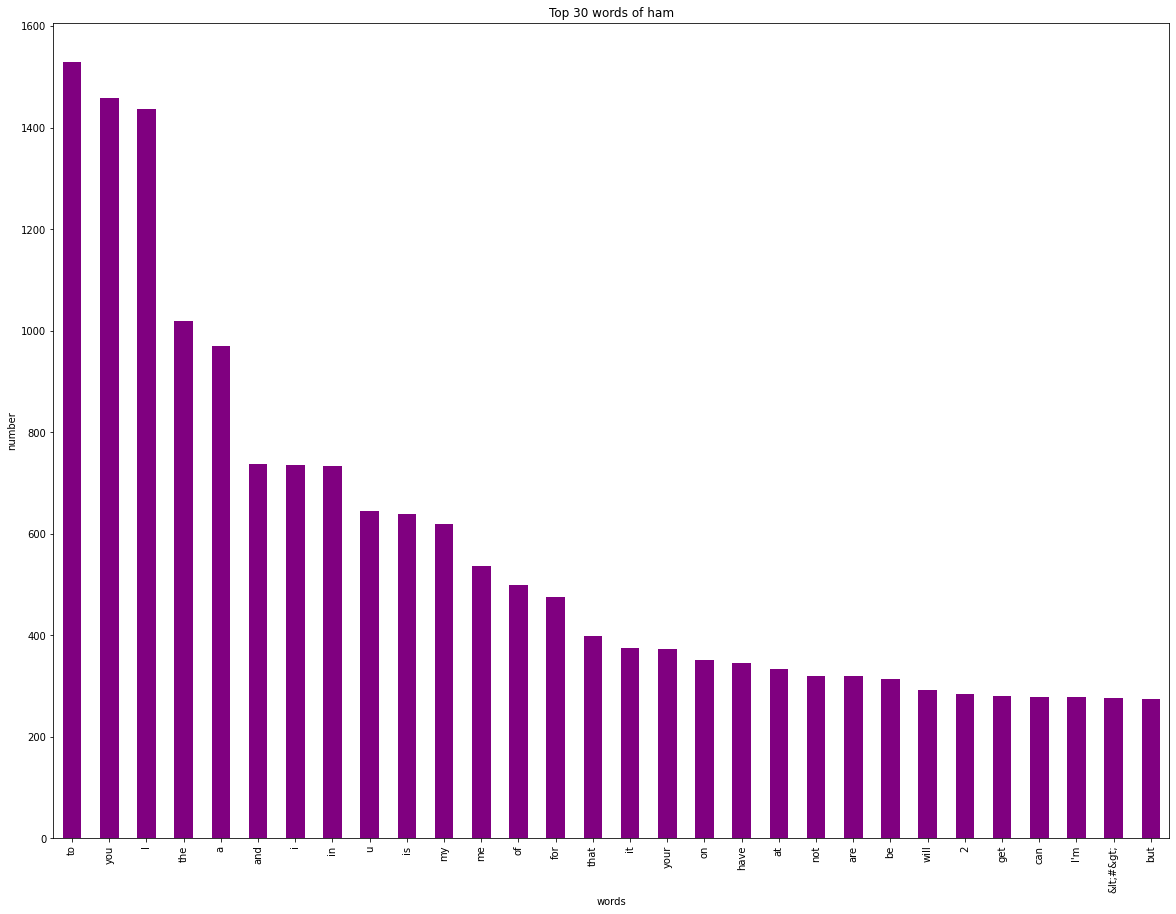

In [13]:
data1.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

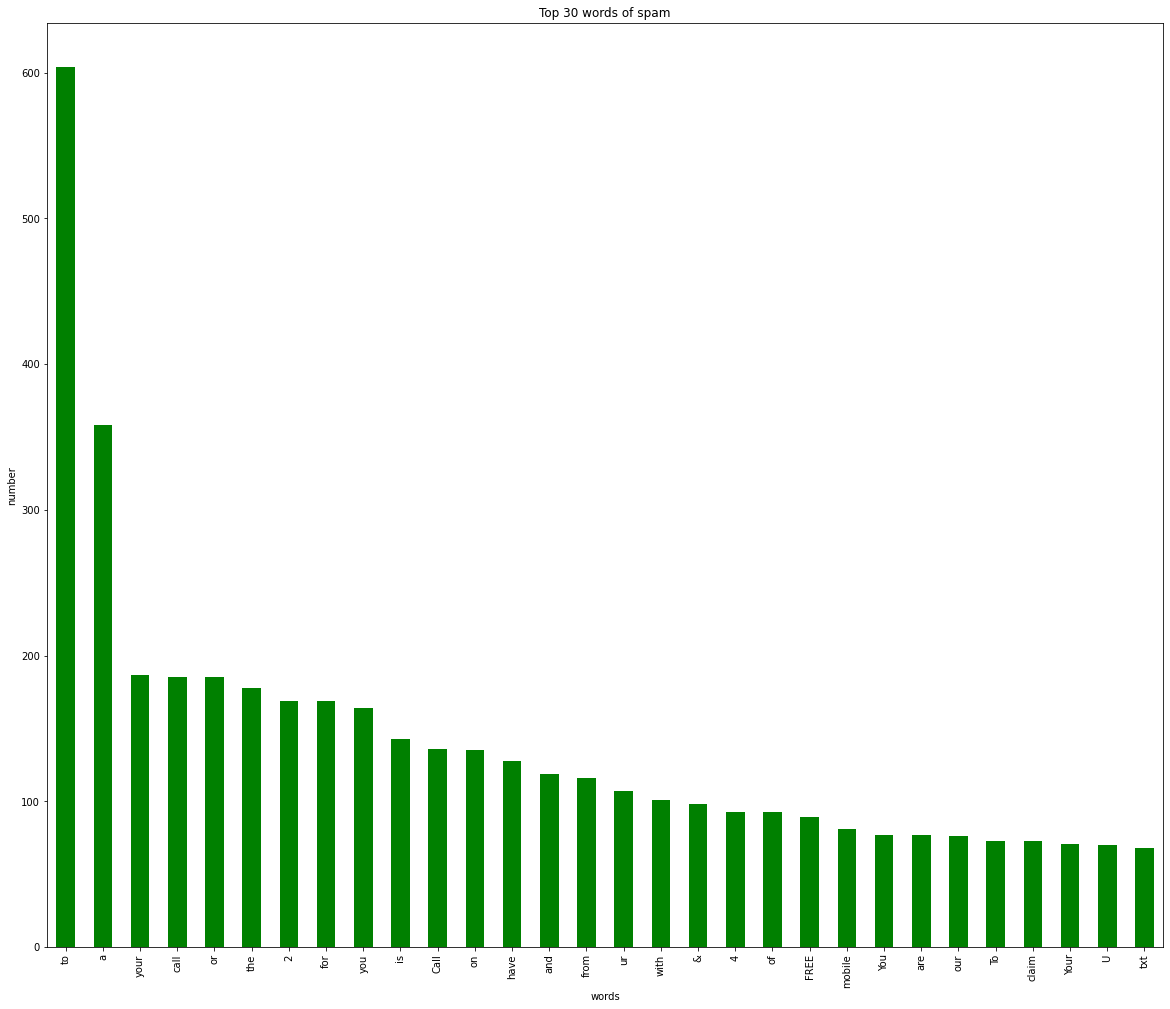

In [14]:
data2.plot.bar(legend = False, color = 'green', figsize = (20,17))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [15]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size = 0.3, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  3900
X_test:  1672
y_train:  3900
y_test:  1672


In [17]:
corpus = []
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

CountVectorizer(max_features=1500)

In [19]:
X_train_cv = cv.transform(X_train)
X_train_cv

<3900x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 42787 stored elements in Compressed Sparse Row format>

In [20]:
X_test_cv = cv.transform(X_test)
X_test_cv

<1672x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 18639 stored elements in Compressed Sparse Row format>

In [21]:
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train_cv,y_train)

y_mnb = mnb.predict(X_test_cv)

Naive Bayes Accuracy:  0.9826555023923444
Naive Bayes confusion_matrix:  [[1425   15]
 [  14  218]]
Confusion matrix, without normalization


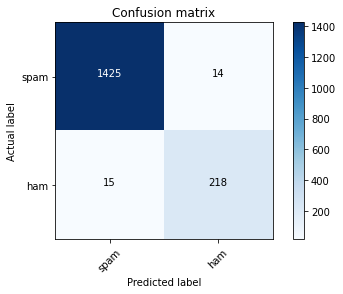

In [24]:
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))
cm = metrics.confusion_matrix(y_test,y_mnb)
plot_confusion_matrix(cm, classes=['spam', 'ham'])

In [25]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv,y_train)
y_svc = svc.predict(X_test_cv)

SVM Accuracy:  0.8343301435406698
SVM confusion_matrix:  [[1303  141]
 [ 136   92]]
Confusion matrix, without normalization


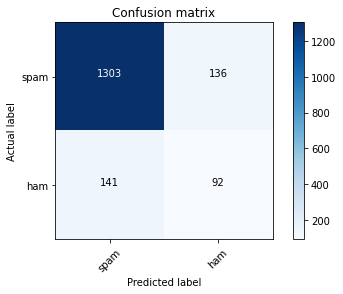

In [26]:
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))
print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))
cm = metrics.confusion_matrix(y_test,y_svc)
plot_confusion_matrix(cm, classes=['spam', 'ham'])

In [27]:
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train_cv,y_train)

y_knc = knc.predict(X_test_cv)

KNeighbors Accuracy_score:  0.8606459330143541
KNeighbors confusion_matrix:  [[1439    0]
 [ 233    0]]
Confusion matrix, without normalization


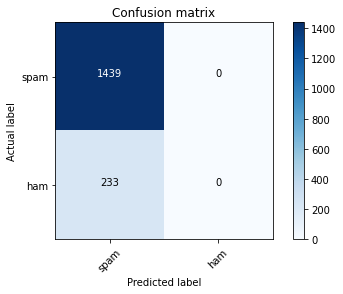

In [28]:
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))
print('KNeighbors confusion_matrix: ', confusion_matrix(y_test, y_knc))
cm = metrics.confusion_matrix(y_test,y_knc)
plot_confusion_matrix(cm, classes=['spam', 'ham'])

In [29]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

Decision Tree Accuracy:  0.9730861244019139
Decision Tree confusion_matrix:  [[1421   27]
 [  18  206]]
Confusion matrix, without normalization


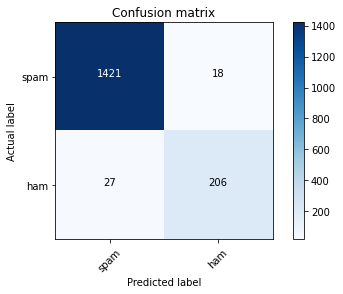

In [30]:
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test))
cm = metrics.confusion_matrix(y_test,y_dtc)
plot_confusion_matrix(cm, classes=['spam', 'ham'])

In [31]:
rfc = RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(X_train_cv,y_train)
y_rfc = rfc.predict(X_test_cv)

Random Forest Accuracy_score:  0.9796650717703349
Random Forest confusion_matrix:  [[1437   32]
 [   2  201]]
Confusion matrix, without normalization


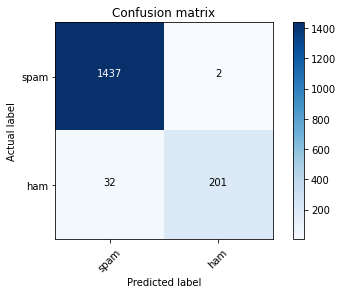

In [32]:
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test))
cm = metrics.confusion_matrix(y_test,y_rfc)
plot_confusion_matrix(cm, classes=['spam', 'ham'])